In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import balanced_accuracy_score
from tsfresh import extract_features, select_features


In [2]:
def plot_array(array, color='blue'):
    if not color == 'blue':
        if color == 1:
            color = 'green'
        else:
            color = 'red'
    plt.figure(figsize=(15, 2))
    plt.plot(array, color=color)
    plt.show()
    
def plot2D_array(array):
    plt.imshow(array, cmap='hot', interpolation='nearest')
    plt.show()

def append_zero_to_each_row(arr):
    zeros = np.zeros((arr.shape[0], 1))
    return np.hstack((arr, zeros))

def plot_arrays(arrays):
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
    plt.figure(figsize=(15, 2))
    for i, array in enumerate(arrays):
        plt.plot(array, color=colors[i % len(colors)])
    plt.show()

In [3]:
df_train = pd.read_csv('data/ptbdb_train.csv')
df_test = pd.read_csv('data/ptbdb_test.csv')
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].values
X_train = append_zero_to_each_row(X_train)
X_test = append_zero_to_each_row(X_test)
X_train.shape, len(X_train), len(X_train[0])

((11640, 188), 11640, 188)

In [4]:
# idx | time | value
#
#
# 3*(11640*188)

x_train_feature_extract = []
for i in range(len(X_train)):
    for j in range(len(X_train[i])):
        x_train_feature_extract.append([i, j, X_train[i][j]])
x_train_feature_extract = np.array(x_train_feature_extract)
df_train_feature_extract = pd.DataFrame(x_train_feature_extract, columns=['id', 'time', 'value'])

x_test_feature_extract = []
for i in range(len(X_test)):
    for j in range(len(X_test[i])):
        x_test_feature_extract.append([i, j, X_test[i][j]])
x_test_feature_extract = np.array(x_test_feature_extract)
df_test_feature_extract = pd.DataFrame(x_test_feature_extract, columns=['id', 'time', 'value'])


In [33]:
X_train_extracted_features = extract_features(df_train_feature_extract, column_id='id', column_sort='time')
X_train_extracted_features.to_csv('data/X_train_extracted_features.csv', index=False)
X_test_extracted_features = extract_features(df_test_feature_extract, column_id='id', column_sort='time')
X_test_extracted_features.to_csv('data/X_test_extracted_features.csv', index=False)

Feature Extraction:   0%|          | 0/20 [00:00<?, ?it/s]

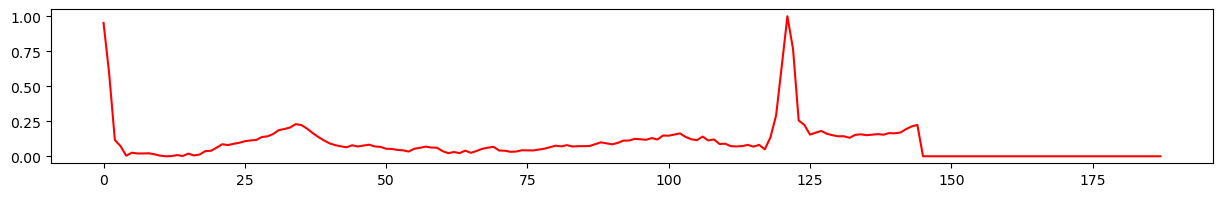

In [4]:
idx = 2
plot_array(X_train[idx], y_train[idx])

In [5]:
cls_0 = np.count_nonzero(y_train == 0)
cls_1 = np.count_nonzero(y_train == 1)
print(f'Class zero samples: {cls_0}, Class one samples: {cls_1}')
print('Based on this information, we can see that the dataset is imbalanced. We use balanced accuracy as metric.')

Class zero samples: 3237, Class one samples: 8403
Based on this information, we can see that the dataset is imbalanced. We use balanced accuracy as metric.


In [6]:
svm_clf_no_features = svm.SVC()
svm_clf_no_features.fit(X_train, y_train)

svm_preds = svm_clf_no_features.predict(X_test)
svm_acc_no_features = balanced_accuracy_score(y_test, svm_preds)
print(f'SVM balanced accuracy: {svm_acc_no_features}')

rf_clf_no_features = RandomForestClassifier()
rf_clf_no_features.fit(X_train, y_train)

rf_preds = rf_clf_no_features.predict(X_test)
rf_acc_no_features = balanced_accuracy_score(y_test, rf_preds)
print(f'Random Forest balanced accuracy: {rf_acc_no_features}')

SVM balanced accuracy: 0.8813936043937409
Random Forest balanced accuracy: 0.9561626833473071


In [7]:
df_train['id'] = range(len(df_train))
X_train.shape

(11640, 188)

In [8]:
#extracted_feautures = extract_features(df_train, column_id='id')

RNNs

In [9]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader


In [97]:
def train_model(model, dataloader, epochs):
    # Define the loss function and the optimizer
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters())
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Move the model to the device
    model = model.to(device)
    model.train()
    # Loop over the epochs
    for epoch in range(epochs):
        for inputs, targets in dataloader:
            # Move inputs and targets to the device
            inputs, targets = inputs.to(device), targets.to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs).squeeze()

            # Compute the loss
            loss = criterion(outputs, targets)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

        print(f'Epoch {epoch+1}/{epochs} Loss: {loss.item()}')
        
def train_model_transformer(model, dataloader, epochs):
    # Define the loss function and the optimizer
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters())
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Move the model to the device
    model = model.to(device)
    model.train()
    # Loop over the epochs
    for epoch in range(epochs):
        for inputs, targets in dataloader:
            # Move inputs and targets to the device
            inputs, targets = inputs.to(device), targets.to(device)
            inputs = inputs.unsqueeze(-1)
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs).prediction_logits.squeeze()

            # Compute the loss
            loss = criterion(outputs, targets)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

        print(f'Epoch {epoch+1}/{epochs} Loss: {loss.item()}')
        
def create_dataloader(X, y, batch_size=32):
    # Convert X and y to PyTorch tensors
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)

    # Wrap them in a TensorDataset
    dataset = TensorDataset(X_tensor, y_tensor)

    # Create a DataLoader
    dataloader = DataLoader(dataset, batch_size=batch_size)

    return dataloader

def get_predictions(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    predictions = []

    with torch.no_grad():  # No need to track gradients
        for inputs, _ in dataloader:
            outputs = model(inputs)
            predictions.extend(outputs.detach().numpy())
    for i in range(len(predictions)):
        if predictions[i] > 0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0

    return np.array(predictions)

def get_predictions_transformer(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    predictions = []

    with torch.no_grad():  # No need to track gradients
        for inputs, _ in dataloader:
            inputs = inputs.unsqueeze(-1)
            outputs = model(inputs)
            predictions.extend(outputs.prediction_logits.detach().numpy())
    for i in range(len(predictions)):
        if predictions[i] > 0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0

    return np.array(predictions)

In [11]:
class RNNModel_uni(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel_uni, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, output_size)


    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc1(out)
        return out

In [12]:
rnn_uni = RNNModel_uni(input_size=188, hidden_size=20, output_size=1)

train_loader = create_dataloader(X_train, y_train)
test_loader = create_dataloader(X_test, y_test)

In [13]:
train_model(rnn_uni, train_loader, epochs=10)

Epoch 1/10 Loss: 0.5499123334884644
Epoch 2/10 Loss: 0.5428112745285034
Epoch 3/10 Loss: 0.52266526222229
Epoch 4/10 Loss: 0.4978412389755249
Epoch 5/10 Loss: 0.4730170667171478
Epoch 6/10 Loss: 0.45120900869369507
Epoch 7/10 Loss: 0.4335772395133972
Epoch 8/10 Loss: 0.41934138536453247
Epoch 9/10 Loss: 0.4072217643260956
Epoch 10/10 Loss: 0.39637231826782227


In [14]:
preds_rnn = get_predictions(rnn_uni.to('cpu'), test_loader)
rnn_uni_acc = balanced_accuracy_score(y_test, preds_rnn)
print(f'RNN unidirectional balanced accuracy: {rnn_uni_acc}')

RNN unidirectional balanced accuracy: 0.8336891550715491


In [15]:
class RNNModel_bi(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel_bi, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.fc1 = nn.Linear(hidden_size*2, output_size)


    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc1(out)
        return out

In [16]:
rnn_bi = RNNModel_bi(input_size=188, hidden_size=20, output_size=1)

In [17]:
train_model(rnn_bi, train_loader, epochs=10)

Epoch 1/10 Loss: 0.5841301679611206
Epoch 2/10 Loss: 0.567115068435669
Epoch 3/10 Loss: 0.5337367653846741
Epoch 4/10 Loss: 0.4975883364677429
Epoch 5/10 Loss: 0.46550410985946655
Epoch 6/10 Loss: 0.4388134479522705
Epoch 7/10 Loss: 0.41644662618637085
Epoch 8/10 Loss: 0.3971051871776581
Epoch 9/10 Loss: 0.37985512614250183
Epoch 10/10 Loss: 0.3643447756767273


In [18]:
preds_rnn_bi = get_predictions(rnn_bi.to('cpu'), test_loader)
rnn_bi_acc = balanced_accuracy_score(y_test, preds_rnn_bi)
print(f'RNN bidirectional balanced accuracy: {rnn_bi_acc}')

RNN bidirectional balanced accuracy: 0.8382086603046603


CNNs

In [19]:
class CNN_vanilla(nn.Module):
    def __init__(self):
        super(CNN_vanilla, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool1d(kernel_size=2)
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(64*21, 128)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.relu1(self.conv1(x))
        x = self.maxpool1(x)
        x = self.relu2(self.conv2(x))
        x = self.maxpool2(x)
        x = self.relu3(self.conv3(x))      
        x = self.maxpool3(x)
        x = x.view(x.size(0), -1)
        x = self.relu4(self.fc1(x))
        x = self.fc2(x)
        return x

In [20]:
conv_vanilla = CNN_vanilla()

In [21]:
train_model(conv_vanilla, train_loader, epochs=10)

Epoch 1/10 Loss: 0.44882044196128845
Epoch 2/10 Loss: 0.34996724128723145
Epoch 3/10 Loss: 0.31033891439437866
Epoch 4/10 Loss: 0.26477426290512085
Epoch 5/10 Loss: 0.20109306275844574
Epoch 6/10 Loss: 0.1580551266670227
Epoch 7/10 Loss: 0.12991636991500854
Epoch 8/10 Loss: 0.11362989991903305
Epoch 9/10 Loss: 0.10672318190336227
Epoch 10/10 Loss: 0.09803147614002228


In [22]:
preds_cnn_van = get_predictions(conv_vanilla.to('cpu'), test_loader)
cnn_van_preds = balanced_accuracy_score(y_test, preds_cnn_van)
print(f'Vanilla CNN balanced accuracy: {cnn_van_preds}')

Vanilla CNN balanced accuracy: 0.948561483170201


In [23]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(out_channels)
            )

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=1):
        super(ResNet, self).__init__()
        self.in_channels = 64

        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.linear = nn.Linear(12032, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = x.unsqueeze(1)
        out = self.relu(self.bn1(self.conv1(out)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

# Define the model
model = ResNet(ResidualBlock, [2, 2])

In [24]:
ConvResNet = ResNet(ResidualBlock, [2, 2], num_classes=1)

In [25]:
train_model(ConvResNet, train_loader, epochs=10)

Epoch 1/10 Loss: 0.3933973014354706
Epoch 2/10 Loss: 0.20826968550682068
Epoch 3/10 Loss: 0.06831397116184235
Epoch 4/10 Loss: 0.012450968846678734
Epoch 5/10 Loss: 0.011599790304899216
Epoch 6/10 Loss: 0.04732903838157654
Epoch 7/10 Loss: 0.0064477939158678055
Epoch 8/10 Loss: 0.13697990775108337
Epoch 9/10 Loss: 0.059688881039619446
Epoch 10/10 Loss: 0.021210338920354843


In [26]:
preds_cnn_res = get_predictions(conv_vanilla.to('cpu'), test_loader)
cnn_res_preds = balanced_accuracy_score(y_test, preds_cnn_res)
print(f'Res Net balanced accuracy: {cnn_res_preds}')

Vanilla CNN balanced accuracy: 0.948561483170201


Transformer based classification


In [142]:
from transformers import PatchTSTConfig, PatchTSTForClassification

config = PatchTSTConfig(
    num_input_channels=1,
    num_targets=1,
    context_length=188,
    num_attention_heads=8,
    ffn_dim=128,
    output_attentions=True,
)

transformer = PatchTSTForClassification(config)

In [143]:
train_model_transformer(transformer, train_loader, epochs=100)

Epoch 1/100 Loss: 0.42746973037719727
Epoch 2/100 Loss: 0.3403642177581787
Epoch 3/100 Loss: 0.3936675488948822
Epoch 4/100 Loss: 0.38482412695884705
Epoch 5/100 Loss: 0.38684648275375366
Epoch 6/100 Loss: 0.36885589361190796
Epoch 7/100 Loss: 0.290865957736969
Epoch 8/100 Loss: 0.15710215270519257
Epoch 9/100 Loss: 0.1466515064239502
Epoch 10/100 Loss: 0.2269773930311203
Epoch 11/100 Loss: 0.14645503461360931
Epoch 12/100 Loss: 0.2102542370557785
Epoch 13/100 Loss: 0.2532804608345032
Epoch 14/100 Loss: 0.18957027792930603
Epoch 15/100 Loss: 0.12150317430496216
Epoch 16/100 Loss: 0.17621105909347534
Epoch 17/100 Loss: 0.13793155550956726
Epoch 18/100 Loss: 0.10725583881139755
Epoch 19/100 Loss: 0.15941515564918518
Epoch 20/100 Loss: 0.0637342557311058
Epoch 21/100 Loss: 0.08635213226079941
Epoch 22/100 Loss: 0.11670487374067307
Epoch 23/100 Loss: 0.0666227787733078
Epoch 24/100 Loss: 0.16066613793373108
Epoch 25/100 Loss: 0.09136539697647095
Epoch 26/100 Loss: 0.04236402362585068
Epoch

In [144]:
preds_transformer = get_predictions_transformer(transformer.to('cpu'), test_loader)
transformer_preds = balanced_accuracy_score(y_test, preds_transformer)
print(f'Transformer balanced accuracy: {transformer_preds}')

Transformer balanced accuracy: 0.9618803638213489


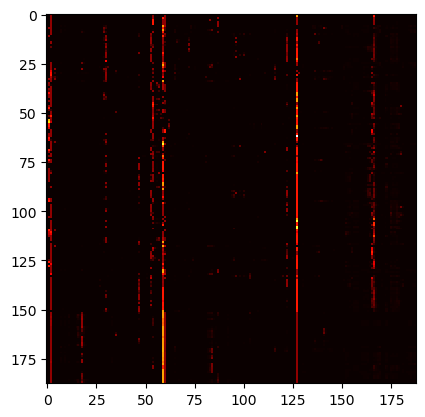

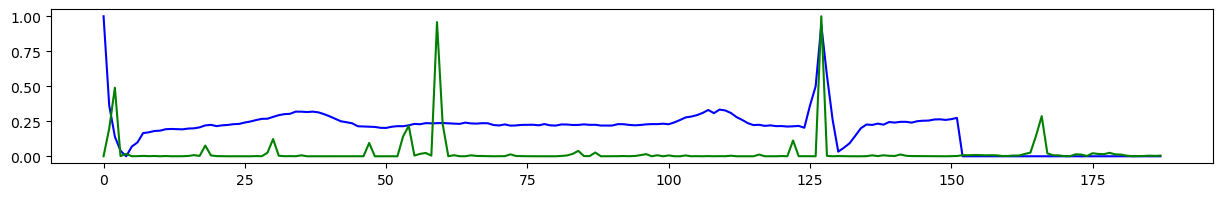

In [167]:
transformer.eval()
idx_vis = 105
x = torch.tensor(X_test[idx_vis], dtype=torch.float).unsqueeze(-1).unsqueeze(0)
#print(x)
y = transformer(x)
attention = y.attentions[-1].mean(dim=1).squeeze().detach().numpy()
plot2D_array(attention)
summed_attention = attention.sum(axis=0)
scaled_attention = summed_attention / np.max(summed_attention)
plot_array
plot_arrays([X_test[idx_vis], scaled_attention])
